# A Tour of Machine Learning Classifiers Using scikit-learn

In this chapter, we will take a tour through a selection of popular and powerful machine learning algorithms that are commonly used in academia as well as in industry. While learning about the differences between several supervised learning algorithms for classification, we will also develop an intuitive appreciation of their individual strengths and weaknesses. In addition, we will take our first step with the scikit-learn library, which offers a user-friedly interface for using those algorithms efficiently and productively. 

The topics that we will learn about throughout this chapter are as follows: 
* Introduction to robust and popular algorithms for classification, such as logistic regression, support vector machines, and decision trees
* Examples and explanations using the scikit-learn machine learning library, which provides a wide variety of machine learning algorithms via a user-friedly Python API
* Discussion about the strengths and weaknesses of classifiers with linear and non-linear decision boundaries

# Choosing a classification algorithm

Choosing an appropriate classification algorithm for a particular problem task requires practice; each algorithm has it own quirks and is based on certain assumptions. To restate the No Free Lunch theorem by David H. Wolpert, no single classifier works best across all posible scenarios. In practice, it is always recommended that you compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem; these may differ in the number of features or samples, the amount of noise in the dataset, and whether the class is linearly separable or not. 

Eventually, the performance of a classifier; computational performance as well as predictive power; depends heavily on the underlying data that is available for learning. The five main steps that are involved in training a machine learning algorithm can be summarized as follows: 

1. Selecting features and collectiong training samples. 
2. Choosing a performance metric. 
3. Choosing a classifier and optimization algorithm. 
4. Evaluating the performance of the model. 
5. Tuning the algorithm. 

Since the approach of this book is to build machine learning knowledge step by step, we will mainly focus on the main concepts of the different algorithms in this chapter and revisit topics such as feature selection and preprocessing, performance metrics, and hyperparameter tuning for more detailed discussions later in this book. 

# First steps with scikit-learn: Training a perceptron

In previous chapter, you learned about two related learning algorithms for classification, the perceptron rule and Adaline, which we implemented in Python by ourselves. Now we will take a look at the scikit-learn API, which combines a user-friendly interface with a highly optimized implementation of several classification algorithms. The scikit-learn library offers not only a large variety of learning algorithms, but also many convenient functions to preprocess data and to fine-tune and evaluate our models. 

To get started with the scikit-learn library, we will train a perceptron model similar to the one that we implemented previously. For simplicity, we will use the already familiar Iris dataset throughout the following sections. Conveniently, the Iris dataset is already available via scikit-learn, since it is a simple yet popular dataset that is frequently used for testing and experimenting with algorithms. We will only use two features from the Iris dataset for visualization purposes. 

We will assign the petal length and petal width of the 150 flower samples to the feature matrix *X* and the corresponding class labels of the flower species to the vector *y*: 

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


The *np.unique(y)* function returned the three unique class labels stored in *iris.target*, and as we see, the Iris flower class *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica* are already stored as integers (here, 0, 1, 2). Although many scikit-learn functions and class methods also work with class labels in string format, using integer labels is a recommended approach to avoid technical glitches and improve computational performance due to a smaller memory footprint; furthermore, encoding class labels as integers is a common convention among most machine learning libraries. 

To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets. Later we will discuss the best practices around model evaluation in more detail: 

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

Using the *train_test_split* function from scikit-learn's *model_selection* module, we randomly split the *x* and *y* arrays into 30 percent test data (45 samples) and 70 percent training data (105 samples). 

Note that the *train_test_split* function already shuffles the training sets internally before splitting; otherwise, all class 0 and class 1 samples would have ended up in the training set, and the test set would consist of 45 samples of class 2. Via the *random_state* parameter, we provided a fixed random seed (*random_state=1*), for the internal pseudo-random number generator that is used for shuffling the datasets prior to splitting. Using such as fixed *random_state* ensures that our results are reproducible. 

Lastly, we took advantage of the built-in support for stratification via *stratify=y*. In this context, stratification means that the *train_test_split* method returns a training and test subsets that have the same proportions of class labels as the input dataset. We can use NumPy's *bincount* function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case: 

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Many machine learning and optimization algorithms also require feature scaling for optimal performance, as we remember from the **gradient descent** examples in previous chapter. Here, we will standardize the features using the *StandardScaler* class from scikit-learn's *preprocessing* module: 

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the preceding code, we loaded the *StandardScaler* class from the *preprocessing* module and initialized a new *StandardScaler* object that we assigned to the *sc* variable. Using the *fit* method, *StandardScaler* estimated the parameters $\mu$ (sample mean) and $\sigma$ (standard deviation) for each feature dimension from the training data. By calling the *transform* method, we then stardardized the training data using those estimated parameters $\mu$ and $\sigma$. Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other. 

Having stardardized the training data, we can now train a perceptron model. Most algorithms in scikit-learn already support multiclass classification by default via *One-versus-Rest (OvR)* method, which allows us to feed the three flower classes to the perceptron all at once. The code is as follows: 

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

/usr/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

The scikit-learn interface remind us of our perceptron implementation in previous chapter: after loading the *Perceptron* class from the *linear_model* module, we initialized a new *Perceptron* object and trained the model via the *fit* method. Here, the model parameter *eta0* is equivalent to the learning rate *eta* that we used in our own perceptron implementation, and the *n_iter* parameter defines the number of epochs (passes over the training set). 

As we remember from previous chapter, findind and appropriate learning rate requires some experimentation. If the learning rate is too large, the algorithm will overshoot the global cost minimum. If the learning rate is too small, the algorithm requires more epochs until convergence, which can make the learning slow, specially for large datasets. Also, we used the *random_state* parameter to ensure the reproducibility of the initial shuffling of the training dataset after each epoch. 

Having trained a model in *scikit-learn*, we can make predictions via the *predict* method, just like in our own perceptron implementation. The code is as follows: 

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


Executing the code, we see that the perceptron misclassifies three out of the 45 flower samples. Thus, the misclassification error on the dataset is approximately *0.067* or *6.7* percent ($3/45 \approx 0.067$). 

Instead of the misclassification **error**, many machine learning practitioners report the classification **accuracy** of a model, which is simply calculated as follows: 

$$1-error = 0.933\ \text{or 93.3 percent}$$

The scikit-learn library also implements a large variety of different perfomance metrics that are available via the *metrics* module. For example, we can calculate the classification accuracy of the perceptron on the test set as follows:

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


Here, *y_test* are the true class labels and *y_pred* are the class labels that we predicted previously. Alternatively, each classifier in scikit-learn has a *score* method, which computes a classifier's prediction accuracy by combining the predict class with *accuracy_score* method as shown here:

In [9]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


Note that we evaluate the performance of our models based on the test set in this chapter. Later you will learn about useful techniques, including graphical analysis such as learning curves, to detect and prevend **overfitting**. Overffiting means that the model captures the patters in the training data well, but fails to generalize well to unseen data. 

Finally, we can use our *plot_decision_regions* function to plot the **decision regions** of our newly trained perceptron model and visualize how well it separates the different flower samples. However, let's add a small modification to highlight the samples from the tes dataset via small circles: 

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, 
                          resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                    alpha=0.8, c=colors[idx], 
                    marker=markers[idx], label=cl, 
                    edgecolor='black')
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                    edgecolor='black', alpha=1.0, 
                    linewidth=1, marker='o', 
                    s=100, label='test set')

With the slight modification that we made to the *plot_decision_regions* function, we can now specify the indices of the samples that we want to mark on the resulting plots. The code is as follows: 

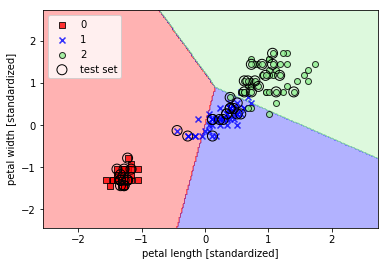

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Remember that the perceptron algorithm never converges on datasets that are not perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice. In the following sections, we will look at more powerful linear classifiers that converge to a cost minimum even if the classes are not perfectly linearly separable. 

# Modeling class probabilities via logistic regression

Although the perceptron rule offers a nice and easygoing introduction to machine learning algorithms for classification, its biggest disadvantage is that it never converges if the class are not perfectly linearly separable. The classification task in the previous section would be an example of such a scenario, Intuitively, we can think of the reason as the weights are continuously being updated since there is always at least one misclassified sample present in each epoch. Of course, you can change the learning rate and increase the number of epochs, but be warned that the perceptron will never converge on this dataset. To make better use of our time, we will now take a look at another simple yet more powerfull algorithm for linear and binary classification problems: **logistic regression**. Note that, in spite of its name, logistic regression is a model for classification, not regression. 

# Logistic regression intuition and conditional probabilities

Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry. Similar to the perceptron and Adaline, the logistic regression model in this chapter is also a linear model for binary classification that can be extended to multiclass classification, for example, via the OvR technique. 

To explain the idea behind logistic regression as a probabilistic model, let's first introduce the **odds ratio**: the odds in favor of a particular event. The odds ratio can be written as $\frac{p}{1-p}$ where $p$ stands for the probability of the positive event. The term *positive event* does not necessarily mean *good*, but refers to the event that we can want to predict, for example, the probability that a patient has a certain disease; we can think of the positive event as class label $y = 1$. We can then further define the *logit* function, which is simply the logarithm of the odds ratio (log-odds): 

$$\text{logit}(p) = \log\frac{p}{(1-p)}$$

Note that *log* refers to the natural logarithm, as it is the common convention in computer science. The *logit* function takes as input values in the range 0 to 1 and transforms them to values over the entire real-number range, which we can use to express a linear relationship between feature values and the log-odds: 

$$\text{logit}(p(y = 1 | x)) = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=0}^{m}w_ix_i = w^Tx$$

Here, $p(y = 1 | x)$ is the condition probability that a particular sample belongs to class 1 given its features $x$. 

Now, we are actually interested in predicting the probability that a certain sample belongs to a particular class, which is the inverse form of the *logit* function. It is also called **logistic sigmoid function**, sometimes simply abbreviated to **sigmoid function** due to its characteristic S-shape:

$$\phi(z) = \frac{1}{1+e^{-z}}$$

Here $z$ is the net input, the linear combination of weights and sample features, $z = w^Tx = w_0x_0 + w_1x_1 + ... + w_mx_m$. 

Note that $w_0$ refers to the bias unit, and is an additional input value that we provide $x_0$, which is set equal to 1. 

Now let us simply plot the sigmoid function for some values in the range -7 to 7 to see how it looks:

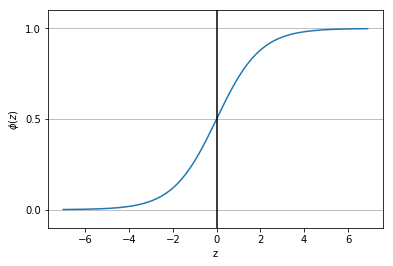

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z): 
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

We can see that $\phi(z)$ approaches 1 if $z$ goes towards infinity ($z \to \infty$ since $e^{-z}$ becomes very small for large values of z. Similarly, $\phi(z)$ goes towards 0 for $z \to -\infty$ as a result of an increasingly large denominator. Thus, we conclude that this sigmoid function takes real number values as input and transform them into values in the range [0, 1] with an intercept at $\phi(z)=0.5$. 

To build some intuition for the logistic regression model, we can relate it to previous chapter. In Adaline, we used the identity function $\phi(z) = z$ as the activation function. In logistic regression, this activation function simply becomes the sigmoid function that we defined earlier. The difference between Adaline and logistic regression is illustrated in the following figure: 

<img src='images/03_03.png'>

The output of the sigmoid function is then interpreted as the probability of a particular sample belonging to class 1, $\phi(z) = P(y = 1 | x;w)$, given its features $x$ parameterized by the weights $w$. For example, if we compute $\phi(z) = 0.8$ for a particular flower sample, it means that the chance that this sample is an *Iris-versicolor* flower is 80 percent. Therefore, the probability that this flower is an *Iris-setosa* flower can be calculated as $P(y = 0 | x;w) = 1 - P(y = 1 | x;w) = 0.2$ or 20 percent. The predicted probability can then simply be converted into a binary outcome via a threshold function:

\begin{equation}
ŷ = 
\begin{cases}
   1, & \text{if}\ \phi(z) \ge 0.5 \\
   0, & \text{otherwise}
\end{cases}
\end{equation}

If we look at the preceding plot of the sigmoid function, this is equivalent to the following: 

\begin{equation}
ŷ = 
\begin{cases}
   1, & \text{if}\ z \ge 0.0 \\
   0, & \text{otherwise}
\end{cases}
\end{equation}

In fact, there are many applications where we are not only interested in the predicted class labels, but where the estimation of the class-memberships probability is particularly useful (the output of the sigmoid function prior to applying the threshold function). Logistic regression is used in weather forecasting, for example, not only to predict if it will rain on a particular day but also to report the chance of rain. Similarly, logistic regression can be used to predict the chance that a patient has a particular disease given certain symptoms, which is why logistic regression enjoys great popularity in the field of medicine. 

# Learning the weights of the logistic cost function

You learned how we could use the logistic regression model to predict probabilities and class labels; now, let us briefly talk about how we fit the parameters of the model, for instance the weights $w$. In the previous chapter, we defined the sum-squared-error cost function as follows:

$$J(w) = \sum_i \frac{1}{2}(\phi(z^{(i)}) - y^{(i)})^2$$

We minimized this function in order to learn the weights $w$ for our Adaline classification model. To explain how we can derive the cost function for logistic regression, let's first define the likelihood $L$ that we want to maximize when we build a logistic regression model, assuming that the indiviual samples in our dataset are independent of one another. The formula is as follows: 

$$L(w) = P(y|x;w) = \prod_{i = 1}^n P(y^{(i)}|x^{(i)};w) = \prod_{i = 1}^n (\phi(z^{(i)}))^{y^{(i)}} (1 - \phi(z^{(i)}))^{1-y^{(i)}}$$

In practice, it is easir to maximize the (natural) log of this question, which is called the log-likelihood function:

$$l(w) = \log L(w) = \sum_{i = 1}^n [y^{(i)} \log(\phi(z^{(i)})) + (1 - y^{(i)}) \log(1 - \phi(z^{(t)}))]$$

Firstly, applying the log function reduces the potential for numerical overflow, which can occur if the likelihoods are very small. Secondly, we can convert the product of fators into a summation of factors, which makes it easier to obtan the derivative of this function via the addiction trick, as you may remember from calculus. 

Now we could use an optimization algorithm such as gradient ascent to maximize this log-likelihood function. Alternatively, let's rewrite the log-likelihood as a cost function $J$ that can be minimized usind gradient descent: 

$$J(w) = \sum_{i = 1}^n [-y^{(i)} \log(\phi(z^{(i)})) - (1 - y^{(i)}) \log(1 - \phi(z^{(t)}))]$$

To get a better grasp of this cost function, let us take a look at the cost that we want to calculate for one single-sample training instance:

$$J(\phi(z), y;w) = -y \log(\phi(z)) - (1 - y) \log(1 - \phi(z))$$

Looking at the equation, we can see that the first term becomes zero if $y = 0$, and the second term becomes zero if $y = 1$: 

\begin{equation}
J(\phi(z), y;w) = 
\begin{cases}
   -log(\phi(z)), & \text{if}\ y = 1 \\
   -log(1 - \phi(z)), & \text{if}\ y = 0 
\end{cases}
\end{equation}

Let's write a short code snippet to create a plot that illustrates the cost of classifying a single-sample instance for different values of $\phi(z)$: 

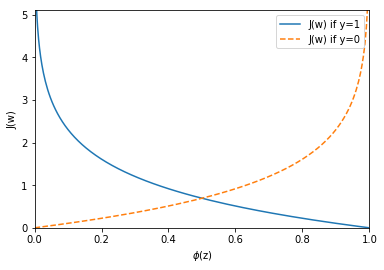

In [13]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

We can see that the cost approaches 0 (continuous line) if we correctly predict that a sample belongs to class 1. Similarly, we can see on the $y$-axis that the cost also approaches 0 if we correctly predict $y=0$ (dashed line. However, if the prediction is wrong, the cost goes towards infinity. The main point is that we penalize wrong predictions with an increasingly larger cost. 

# Converting an Adaline implementation into an algorithm for logistic regression

If we were to implement logistic regression ourselves, we could simply substitute the cost function $J$ in our Adaline implementation with the new cost function: 

$$J(w) = \sum_{i = 1}^n [-y^{(i)} \log(\phi(z^{(i)})) - (1 - y^{(i)}) \log(1 - \phi(z^{(t)}))]$$

We use this to compute the cost of classifying all training samples per epoch. Also, we need to swap the linear activation function with the sigmoid activation and change the threshold function to return class labels 0 and 1 instead of -1 and 1. If we make those three changes to the Adaline code, we would end up with a working logistic regression implementation, as shown here: 

In [15]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic cost now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

When we fit a logistic regression model, we have to keep in mind that it only work for binary classification tasks. So, let us consider only *Iris-setosa* and *Iris-versicolor* flowers (classes 0 and 1) and check that our implementation of logistic regression works:

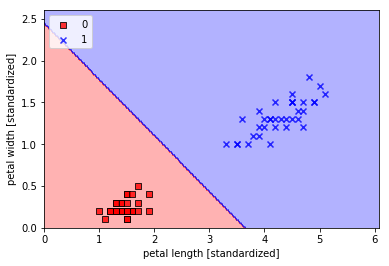

In [16]:
X_train_01_subset = X_train[(y_train==0) | (y_train==1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, 
                            random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, 
                      classifier=lrgd)
plt.ylim(0.0, 2.6)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Training a logistic regression model with scikit-learn

We just went through useful coding and math exercises in the previous subsection, which helped illustrate the conceptual differences between Adaline and logistic regression. Now, let's learn how to use scikit-learn's more optimized implementation of logistic regression that also supports multi-class settings off the shelf (OvR by default). In the following code example, we will use the *sklearn.linear_model.LogisticRegression* class as well as the familiar *fit* method to train the model on all three classes in the stardardized flower training dataset: 

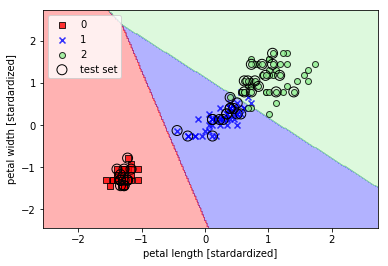

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=lr, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [stardardized]')
plt.ylabel('petal width [stardardized]')
plt.legend(loc='upper left')
plt.show()

Looking at the preceding code that we used to train the *LogisticRegression* model, you might now be wondering, "What is the mysterious parameter *c*?" We will discuss this parameter in the next subsection, where we first introduce the concepts of overfitting and regularization. However, before we are moving on to those topics, let's finish our discussion of class-membership probabilities. 

The probability that training samples belong to a certain class can be computed using the *predict_proba* method. For example, we can predict the probabilities of the first three samples in the test set as follows:

In [18]:
lr.predict_proba(X_test_std[:3, :])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

The first row corresponds to the class-membership probabilities of the first flower, the second row corresponds to the class-membership probabilities of the third flower, and so forth. Notice that the columns sum all up to one, as expected. The highest value in the first row is approximately 0.853, which means that the first sample belongs to class three (*Iris-virginica*) with a predicted probability of 85.7 percent. So, as you may have already notice, we can get the predicted class labels by identifying the largest column in each row, for example, using NumPy's *argmax* function: 

In [19]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

The class labels we obtained from the preceding conditional probabilities is, of course, just a manual approach to calling the *predict* method directly, which we can quickly verify as follows:

In [20]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

Lastly, a word of caution if you want to predict the class label of a single flower sample: scikit-learn expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy's *reshape* method to add a new dimension, as demonstrated here:

In [21]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

# Tackling overfitting via regularization

**Overfitting** is a common problem in machine learning, where **a model performs well on training data but does not generalize well to unseen data (test data)**. If a model suffers from overfitting, we also that **the model has high variance**, which can be caused by having **too many parameters** that lead to a model that is **too complex** given the underlying data. Similarly, our model can also suffer from **underfitting** (**high bias**), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data. 

Although we have only encountered linear models for classification so far, the problem of overfitting and underfitting can be best illustrated by comparing a linear decision boundary to more complex, nonlinear decision boundaries as shown in the following figure: 

<img src='images/03_07.png'>

Variance measures the consistency (or variability) of the model prediction for a particular sample instance if we were to retrain the model multiple times, for example, on different subsets of the training dataset. We can say that the model is sensitive to the randomness in the training data. In contrast, bias measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different training datasets; bias is the measure of the systematic error that is not due to randomness. 

One way of findind a good bias-variance tradeoff is to tune the complexity of the model via regularization. **Regularization** is a very useful method to handle collinearity (high correlation among features), filter out noise from data, and eventually prevent overfitting. The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter (weight) values. The most common form of regularization is so-called L2 regularization (sometimes also called L2 shrinkage or weight decay), which can be written as follows:

$$\frac{\lambda}{2}\vert\vert w\vert\vert^2 = \frac{\lambda}{2}\sum_{j=1}^m w_j^2$$

Here, $\lambda$ is the so-called **regularization parameter**. 

Regularization is another reason why feature scaling such as standardization is important. For regularization to work property, we need to ensure that all our features are on comparable scales. 

The cost function for logistic regression can be regularized by adding a simple regularization term, which will shrink the weights during model training: 

$$J(w) = \sum_{i = 1}^n [-y^{(i)} \log(\phi(z^{(i)})) - (1 - y^{(i)}) \log(1 - \phi(z^{(t)}))] + \frac{\lambda}{2}\vert\vert w\vert\vert^2$$

Via the regularization parameter $\lambda$, we can then control how well we fit the training data while keeping the weights small. By increasing the value of $\lambda$, we increase the regularization strength. 

The parameter *C* that is implemented for the *LogisticRegression* class in scikit-learn comes from a convention i support vector machines, which will be the topic of the next section. The term *C* is directly related to the regularization parameter $\lambda$, which is it inverse. Consequently, decreasing the value of the inverse regularization parameter *C* means that we are increasing the regularization strength, which we can visualize by plotting the L2-regularization path for the two weight coefficients:

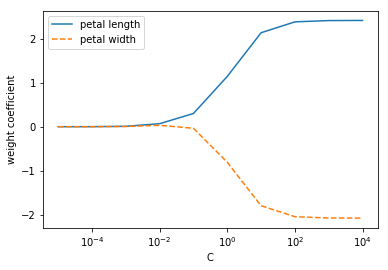

In [22]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

By executing the preceding code, we fitted ten logistic regression models with different values for the inverse-regularization parameter *C*. For the purpose of illustration, we only collected the weight coefficients of class 1 (here, the second class in the dataset, *Iris-versicolor*) versus all classifiers, remember that we are using the OvR technique for multiclass classification. 

As we can see in the resulting plot, the weight coefficients shrink if we decrease parameter *C*, that is, if we increase the regularization strength.

# Maximum margin classification with support vector machines

Another powerful and widely used learning algorithm is the **Suport Vector Machine (SVM)**, which can be considered an extension of the perceptron. Using the perceptron algorithm, we minimized misclassification errors. However, in SVMs our optimization objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are so-called **support vectors**. This is illustrated in the following figure: 

<img src='images/03_09.png'>

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting. 

Although we do not want to dive much deeper into the more involved mathematical concepts behind the maximum-margin classification, let us briefly mention the slack variable $\zeta$, which was introduced by Vladimir Vapnik in 1995 and led to the so-called **soft-margin classification**. The motivation for introducing the slack variable allow the convergence of the optimization in the presence of misclassifications, under appropriate cost penalization. 

Via the variable *C*, we can then control the penalty for misclassification. Large values of *C* correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for *C*. We can then use the *C* parameter to control the width of the margin and therefore tune the bias-variance trade-off, as illustrated in the following figure:

<img src='images/03_10.png'>

This concept is related to regularization, which we discussed in the previous section in the context of regularized regression where decreasing the value of *C* increases the bias and lowers the variance of the model. 

Now that we have learned the basic concepts behind a linear SVM, let us train an SVM model to classify the different flowers in our Iris dataset:

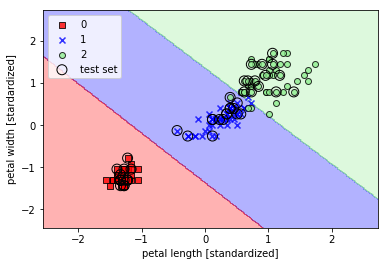

In [24]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [stardardized]')
plt.legend(loc='upper left')
plt.show()

## Logistic regression versus support vector machines

In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs, which mostly care about the points that are closest to the decision boundary (support vectors). On the other hand, logistic regression has the advantage that it is a simpler model that can be implemented more easily. Furthermore, logistic regression models can be easily updated, which is attractive when working with streaming data. 

# Alternative implementations in scikit-learn

Scikit-learn offers alternative implementations via the *SGDClassifier* class, which also supports online learning via the *partial_fit* method. The concept behind the *SGDClassifier* class is similiar to the stochastic gradient descent algororithm that we implemented before. We could initialize the stochastic gradient descent version of the perceptron, logistic regression and a support vector machine with default parameters as follows: 

In [25]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# Solving nonlinear problems using a kernel SVM

Another reason why SVMs enjoy high popularity among machine learning practitioners is that it can be easily *kernelized* to solve nonlinear classification problems. Before we discuss the main concept behind the **kernel SVM**, let's first create a sample dataset to see what such a nonlinear classification problem may look like.

# Kernel methods for linearly inseparable data

Using the following code, we will create a simple dataset that has the form of an XOR gate using the *logical_or* function from NumPy, where 100 samples will be assigned the class label 1, and 100 samples will be assigned the class label -1: 

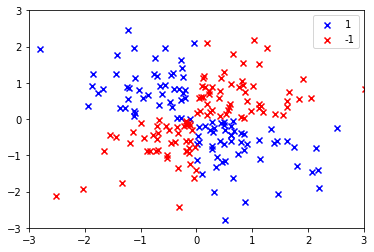

In [26]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], 
            X_xor[y_xor==1, 1], c='b', marker='x', 
            label='1')
plt.scatter(X_xor[y_xor==-1, 0], 
            X_xor[y_xor==-1, 1], c='r', marker='x', 
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

Obviously, we would not be able to separate samples from the positive and negative class very well using a linear hyperplane as a decision boundary via the linear logistic regression or linear SVM model that we discussed in earlier sections. 

The basic idea behind **kernel methods** to deal with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function $\phi$ where it becomes linearly separable. As shown in the following figure, we can transform a two-dimensional dataset onto a new three-dimensional feature space where the classes become separable via the following projection: 

$$\phi(x_1, x_2) = (z_1, z_2, z_3) = (x_1, x_2, x_1^2 + x_2^2)$$

This allows us to separate the two classes shown in the plot via a linear hyperplane that becomes a nonlinear decision boundary if we project it back onot the original feature space: 

<img src='images/03_13.png'>

# Using the kernel trick to find separating hyperplanes in the high-dimensional space

To solve a nonlinear problem using an SVM, we would transform the training data onto a higher-dimensional feature via a mapping function $\phi$ and train a linear SVM model to classify the data in this new feature space. Then, we can use the same mapping function $\phi$ to transform new, unseen data to classify it using the linear SVM model. 

However, one problem with this mapping approach is that the construction of the new features is computationally very expensive, especially if we are dealing with high-dimensional data. This is where the so-called kernel trick comes to play. Although we did not go into much detail about how to solve the quadratic programming task to train an SVM, in practice all we need is to replace the dot product $x^{(i)T}x^j$ by $\phi(x^{(i)})^t \phi(x^{(j)})$. In order to save the expensive step of calculating this dot product between two points explicitly, we define a so-called **kernel function**. One of the most widely used kernels is the **Radial Basis Function (RBF)** kernel or simply called the **Gaussian kernel**:

$$\kappa(x^{(i)}, x^{(j)}) = \exp{-\frac{||x^{(i)} - x^{(j)}||^2}{2\sigma^2}}$$

This is often simplified to:

$$\kappa(x^{(i)}, x^{(j)}) = \exp{-\gamma||x^{(i)} - x^{(j)}||^2}$$

Here, $\gamma = \frac{1}{2\sigma^2}$ is a free parameter that is to be optimized. 

Roughly speaking, the term **kernel** can be interpreted as a **similarity function** between a pair of samples. The minus sign inverts the distance measure into a similarity score, and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar samples) and 0 (for very similar samples). 

Now that we defined the big picture behind the kernel trick, let us see if we can train a kernel SVM that is able to draw a lonlinear decision boundary that separates the XOR data well. Here, we simply use the *SVC* class from scikit-learn that we imported earlier and replace the *kernel='linear'* parameter with *kernel='rbf'*: 

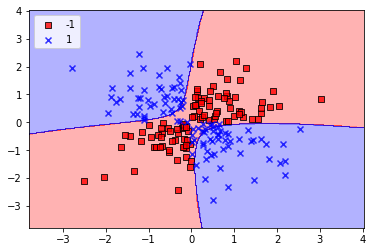

In [27]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

The $\gamma$ parameter, which we set to *gamma=0.1* can be understood as a **cut-off** parameter for the Gaussian sphere. If we increase the value for $\gamma$, we increase the influence or reach of the training samples, which leads to a tighter and bumpier decision boundary. To get a better intuition of $\gamma$, let us apply an RBF kernel SVM to our Iris flower dataset:

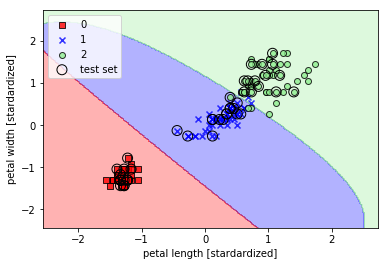

In [29]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [stardardized]')
plt.ylabel('petal width [stardardized]')
plt.legend(loc='upper left')
plt.show()

Since we chose a relatively small value for $\gamma$, the resulting decision boundary of the RBF kernel SVM model will be relatively soft, as shown in the preceding figure.

Now, let us increase the value of $\gamma$ and observe the effect on the decision boundary: 

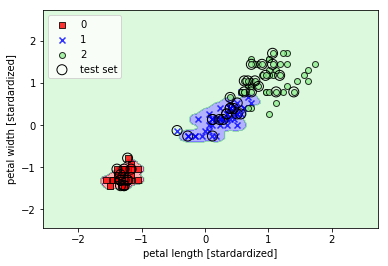

In [30]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [stardardized]')
plt.ylabel('petal width [stardardized]')
plt.legend(loc='upper left')
plt.show()

In the resulting plot, we can now see that the decision boundary around the classes 0 and 1 is much tighter using a relatively large value of $\gamma$. 

Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the $\gamma$ parameter also plays an important role in controlling overfitting. 

# Decision tree learning

**Decision tree** classifiers are attractive models if we care about interpretability. As the name decision tree suggests, we can think of this model as breaking down our data by making decision based on asking a series of questions. 

Let's consider the following example in which we use a decision tree to decide upon an activity on a particular day: 

<img src='images/03_17.png'>

Based on the features in our training set, the decision tree model learns a series of questions to infer the class labels of the samples. Although the preceding figure illustrates the concept of a decision tree based on categorical variables, the same concept applies if our features are real numbers, like in the Iris dataset. For example, we could simply define a cut-off value along the **sepal width** feature axis and ask a binary question "Is sepal width >= 2.0 cm?".

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest **Information Gain (IG**). In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to **prune** the tree by setting a limit for the maximal depth of the tree. 

The three impurity measures or splitting criteria that are commonly used in binary decision trees are **Gini impurity**, **entropy** and the **classification error**. 

# Building a decision tree

Decision trees can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting. Using scikit-learn, we will now train a decision tree with a maximum depth of 3, using entropy as a criterion for impurity. Although feature scaling may be desired for visualization purposes, note that feature scaling is not a requirement for decision tree algorithms. The code is as follows: 

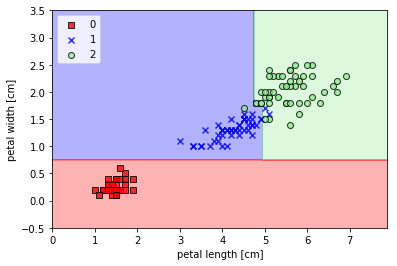

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, 
                      test_idx=range(150, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.ylim([-0.5, 3.5])
plt.legend(loc='upper left')
plt.show()

A nice feature in scikit-learn is that it allows us to export the decision tree as a .dot file after training, which we can visualize using the GraphViz program, for example. In addition to GraphViz, we will use a Python library called *pydotplus*, which has capabilities similar to GraphViz and allows us to convert *.doc* data files into a decision tree image file. 

The following code will create an image of our decision tree in PNG format in our local directory: 

In [36]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, 
                           class_names=['Setosa', 
                                        'Versicolor', 
                                        'Virginica'], 
                           feature_names=['petal length', 
                                          'petal width'], 
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('images/tree.png')

True

By using the *out_file=None* setting, we directly assigned the dot data to a *dot_data* variable, instead of writing an intermediate *tree.dot* file to disk. The arguments for *filled, rounded, class_names* and *feature_names* are optional but make the resulting image file visually more appealing by adding color, rounding the box edges, showing the name of the majority class label at each node, and displaying the feature names in the splitting criterion. These setting resulted in the following decision tree image:

<img src='images/tree.png'>

Looking at the decision tree figure, we can now nicely trace back the splits that the decision tree determined from our training dataset. We started with 105 samples at the root and split them into two child nodes with 35 and 70 samples, using the **petal width** cut-off $\le 0.75$ cm. After the first split, we can see that the left child is already pure and only contains samples from the *Iris-setosa* class (Gini Impurity = 0). The further splits on the right are then used to separate the samples from the *Iris-versicolor* and *Iris-virginica* class. 

Looking at this tree, and the decision region plot of the tree, we see that the decision tree does a very good job of separating the flower classes. Unfortunately, scikit-learn currently does not implement functionality to manually post-prune a decision tree. 

# Combining multiple decision trees via random forests

**Random forests** have gained huge popularity in applications of machine learning during the last decade due to their good classification performance, scalability, and ease of use. Intuitively, a random forest can be considered as an **ensemble** of decision trees. The idea behind a random forest is to average multiple (deep) decision trees that individually suffer from high variance, to build a more robust model that has a better generalization performance and is less susceptible to overfitting. The random forest algorithm can be summarized in four simple steps:

1. Draw a random **bootstrap** sample of size *n* (randomly choose n samples from the training set with replacement). 
2. Grow a decision tree from the bootstrap sample. At each node: 
    1. Randomly select *d* features without replacement. 
    2. Split the node using the feature that provides the best split according to the objective function, for instance, maximizing the information gain. 
3. Repeat the step 1-2 *k* times. 
4. Aggregate the prediction by each tree to assign the class label by **majority vote**. 

We should note one slight modification in step 2 when we are training the individual decision trees: instead of evaluating all features to determine the best split at each node, we only consider a random subset of those. 

Although random forest do not offer the same level of interpretability as decision trees, a big advantage of random forests is that we do not have to worry so much about choosing good hyperparameter values. We typically do not need to prune the random forest since the ensemble model is quite robust to noise from the individual decision trees. The only parameter that we really need to care about in practice is the number of trees *k* (step 3) that we choose for the random forest. Typically, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost.

Although it is less common in practice, other hyperparameters of the random forest classifier that can be optimized are the size *n* of the bootstrap sample (step 1) and the number of features *d* that is randomly chosen for each split (step 2.1), respectively. Via the sample size *n* of the bootstrap sample, we control the bias-variance tradeoff of the random forest. 

Decreasing the size of the bootstrap sample increases the diversity among the individual trees, since the probability that a particular training sample is included in the bootstrap sample is lower. Thus, shrinking the size of the bootstrap samples may increase the *randomness* of the random forest, and it can help to reduce the effect of overfitting. However, smaller bootstrap samples typically result in a lower overall performance of the random forest, a small gap between training and test performance, but a low test performance overall. Conversely, increasing the size of the bootstrap sample may increase the degree of overfitting. Because the bootstrap samples, and consequently the individual decision trees, become more similar to each other, they can learn to fit the original training dataset more closely. 

In most implementations, including the *RandomForestClassifier* implementation in scikit-learn, the size of the bootstrap sample is chosen to be equal to the number of samples in the original training set, which usually provides a good bias-variance tradeoff. For the number of features *d* at each split, we want to choose the value that is smaller then the total number of features in the training set. A reasonable default that is used in scikit-learn and other implementations is $d = \sqrt{m}$, where *m* is the number of features in the training set. 

Conveniently, we do not have to construct the random forest classifier from individual decision trees by ourselves because ther is already an implementation in scikit-learn that we can use:

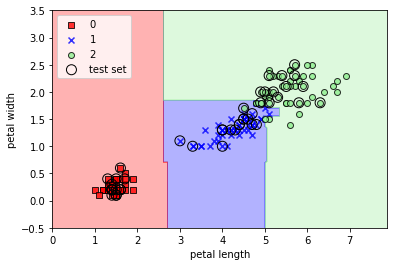

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', 
                                n_estimators=25, 
                                random_state=1, 
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, 
                      test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.ylim([-0.5, 3.5])
plt.legend(loc='upper left')
plt.show()

Using the preceding code, we trained a random forest from 25 decision trees via the *n_estimators* parameter and used the entropy criterion as an impurity measure to split nodes. Although we are growing a very small random forest from a very small training dataset, we used the *n_jobs* parameter for demonstration purposes, which allows us to parallelize the model training using multiple cores of our computer (here two cores). 